# MAP - skala
Datacamp 2024 - Tristan Waddington

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

import os
import sklearn
import rampwf

import problem

pd.set_option("display.max_columns", None)
print("sklearn", sklearn.__version__)
print("ramp", rampwf.__version__)

sklearn 1.6.0
ramp 0.7.0


## 1. Data exploration

In [2]:
os.environ["RAMP_TEST_MODE"] = "7"
X_df, y = problem.get_train_data()

In [3]:
X_df.shape

(2100, 12)

In [4]:
X_df.head()

n_seg  subject   age gender domain  height  weight   bmi   id  \
0    688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
1    688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
2    688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
3    688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
4    688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   

                                                 ecg  \
0  [0.3688673837817671, 0.3620627421921535, 0.365...   
1  [0.25735809742643956, 0.23910011930527947, 0.2...   
2  [0.13428866369506492, 0.14334834365416743, 0.1...   
3  [0.17744878960204316, 0.18312116528072353, 0.2...   
4  [0.6703874816047055, 0.5075806829705767, 0.444...   

                                                 ppg chunk  
0  [0.40960445864963035, 0.36931866813001185, 0.3...   NaN  
1  [0.36706728559046503, 0.4034043141571599, 0.35...   NaN  
2  [0.7494333513716098, 0.8147798178151058, 0.799...   NaN  
3  [0.2668839934294831, 0.26939094339014175, 0.25...   NaN  
4  [0.27162392568169147, 0.2647447495713346, 0.24...   NaN

In [5]:
X_df["domain"].value_counts()

domain
m    1100
v    1000
Name: count, dtype: int64

### Skala preparation

In [6]:
X_df["sample_domain"] = X_df["domain"].map({"v": 1, "m": -1})
X_df

n_seg  subject   age gender domain  height  weight   bmi     id  \
0       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
1       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
2       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
3       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
4       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
...     ...      ...   ...    ...    ...     ...     ...   ...    ...   
2095    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2096    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2097    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2098    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2099    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   

                                                    ecg  \
0     [0.3688673837817671, 0.3620627421921535, 0.365...   
1     [0.25735809742643956, 0.23910011930527947, 0.2...   
2     [0.13428866369506492, 0.14334834365416743, 0.1...   
3     [0.17744878960204316, 0.18312116528072353, 0.2...   
4     [0.6703874816047055, 0.5075806829705767, 0.444...   
...                                                 ...   
2095  [0.2785793562708102, 0.28412874583795783, 0.25...   
2096  [0.2987085906793936, 0.3161145423919146, 0.212...   
2097  [0.20290697674418606, 0.1430232558139535, 0.10...   
2098  [0.19429778247096094, 0.18373812038014786, 0.1...   
2099  [0.28121098626716606, 0.27153558052434457, 0.2...   

                                                    ppg chunk  sample_domain  
0     [0.40960445864963035, 0.36931866813001185, 0.3...   NaN              1  
1     [0.36706728559046503, 0.4034043141571599, 0.35...   NaN              1  
2     [0.7494333513716098, 0.8147798178151058, 0.799...   NaN              1  
3     [0.2668839934294831, 0.26939094339014175, 0.25...   NaN              1  
4     [0.27162392568169147, 0.2647447495713346, 0.24...   NaN              1  
...                                                 ...   ...            ...  
2095  [0.19241192411924118, 0.1603432700993677, 0.13...   val             -1  
2096  [0.11162361623616242, 0.11531365313653143, 0.1...   val             -1  
2097  [0.04311482622085346, 0.04311482622085346, 0.0...   val             -1  
2098  [0.20263870094722602, 0.18775372124492556, 0.1...   val             -1  
2099  [0.7211621856027752, 0.7506504770164786, 0.775...   val             -1  

[2100 rows x 13 columns]

In [7]:
# Selected numerical columns for the first regressor
num_cols = ["age", "height", "weight", "bmi"]


## 2. Regressor

In [8]:
X_df


n_seg  subject   age gender domain  height  weight   bmi     id  \
0       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
1       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
2       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
3       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
4       688  p000750  78.0      M      v   162.0    50.6  19.3    1.0   
...     ...      ...   ...    ...    ...     ...     ...   ...    ...   
2095    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2096    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2097    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2098    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   
2099    470  p090269  76.0      M      m     NaN     NaN   NaN  186.0   

                                                    ecg  \
0     [0.3688673837817671, 0.3620627421921535, 0.365...   
1     [0.25735809742643956, 0.23910011930527947, 0.2...   
2     [0.13428866369506492, 0.14334834365416743, 0.1...   
3     [0.17744878960204316, 0.18312116528072353, 0.2...   
4     [0.6703874816047055, 0.5075806829705767, 0.444...   
...                                                 ...   
2095  [0.2785793562708102, 0.28412874583795783, 0.25...   
2096  [0.2987085906793936, 0.3161145423919146, 0.212...   
2097  [0.20290697674418606, 0.1430232558139535, 0.10...   
2098  [0.19429778247096094, 0.18373812038014786, 0.1...   
2099  [0.28121098626716606, 0.27153558052434457, 0.2...   

                                                    ppg chunk  sample_domain  
0     [0.40960445864963035, 0.36931866813001185, 0.3...   NaN              1  
1     [0.36706728559046503, 0.4034043141571599, 0.35...   NaN              1  
2     [0.7494333513716098, 0.8147798178151058, 0.799...   NaN              1  
3     [0.2668839934294831, 0.26939094339014175, 0.25...   NaN              1  
4     [0.27162392568169147, 0.2647447495713346, 0.24...   NaN              1  
...                                                 ...   ...            ...  
2095  [0.19241192411924118, 0.1603432700993677, 0.13...   val             -1  
2096  [0.11162361623616242, 0.11531365313653143, 0.1...   val             -1  
2097  [0.04311482622085346, 0.04311482622085346, 0.0...   val             -1  
2098  [0.20263870094722602, 0.18775372124492556, 0.1...   val             -1  
2099  [0.7211621856027752, 0.7506504770164786, 0.775...   val             -1  

[2100 rows x 13 columns]

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from skada import JDOTRegressor

clf = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), ["gender"]),
        (
            FunctionTransformer(
                lambda x: np.vectorize({"v": 1, "m": -1}.get)(x)
            ),
            ["domain"],
        ),
        ("passthrough", ["age", "height", "weight", "bmi"]),
    )
)
clf.fit_transform(X_df[-10:])

array([[ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan],
       [ 1., -1., 76., nan, nan, nan]])

In [10]:
from skada import source_target_split, JDOTRegressor

Xs, Xt, ys, yt = source_target_split(
    X_df[num_cols + ["gender"]], y, sample_domain=X_df["sample_domain"]
)

In [ ]:
# Train a regressor on source data
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


model = make_pipeline(
    make_column_transformer((OneHotEncoder(), ["gender"])),
    KernelRidge(kernel="rbf", alpha=0.5),
)
model.fit(Xs, ys)
# Compute accuracy on source and target
ys_pred = model.predict(Xs)
yt_pred = model.predict(Xt)

mse_s = mean_squared_error(ys, ys_pred)
mse_t = mean_squared_error(yt, yt_pred)

print(f"MSE on source: {mse_s:.2f}")
print(f"MSE on target: {mse_t:.2f}")

MSE on source: 170.99
MSE on target: 8142.48


In [ ]:
# Train on target data
jdot = make_pipeline(
    make_column_transformer((OneHotEncoder(), ["gender"])),
    JDOTRegressor(
        base_estimator=KernelRidge(kernel="rbf", alpha=0.5), alpha=0.01
    ),
)

jdot.fit(X_df[num_cols + ["gender"]], y, sample_domain=X_df["sample_domain"])

ys_pred = jdot.predict(Xs)
yt_pred = jdot.predict(Xt)

mse_s = mean_squared_error(ys, ys_pred)
mse_t = mean_squared_error(yt, yt_pred)


print(f"JDOT MSE on source: {mse_s:.2f}")
print(f"JDOT MSE on target: {mse_t:.2f}")


JDOT MSE on source: 245.18
JDOT MSE on target: 8355.19


---
## tsFresh


In [6]:
from tsfresh.transformers import RelevantFeatureAugmenter
from tsfresh.utilities.dataframe_functions import impute


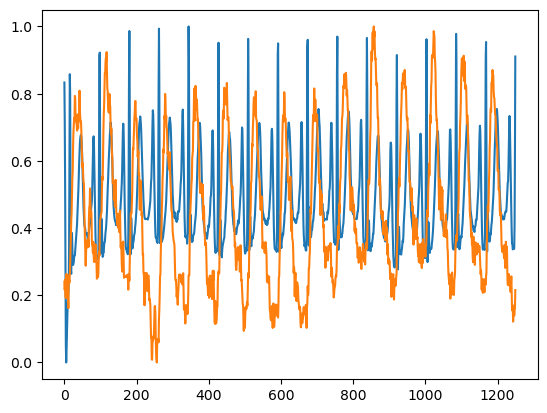

In [7]:
plt.plot(X_df[["ecg"]].iloc[140].values[0])
plt.plot(X_df[["ppg"]].iloc[140].values[0])


In [58]:
NB_TRAIN_SAMPLES = 1000
X_df["i_seg"] = X_df["n_seg"].astype(str) + "_" + X_df.index.astype(str)
X_explode = (
    X_df[["i_seg", "ecg", "ppg"]]
    .iloc[:NB_TRAIN_SAMPLES]
    .explode(["ecg", "ppg"], ignore_index=True)
)
X_explode["step"] = X_explode.index
X_explode = X_explode.fillna(0)
X_explode

/var/folders/vw/2kmjpl310zl2lwgnwpxsyw4r0000gn/T/ipykernel_20707/167340622.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_explode = X_explode.fillna(0)


i_seg       ecg       ppg     step
0          688_0  0.368867  0.409604        0
1          688_0  0.362063  0.369319        1
2          688_0  0.365301  0.347889        2
3          688_0  0.363867  0.329997        3
4          688_0  0.363760  0.298125        4
...          ...       ...       ...      ...
1249995  264_999  0.415670  0.348582  1249995
1249996  264_999  0.442515  0.355926  1249996
1249997  264_999  0.449593  0.359659  1249997
1249998  264_999  0.426747  0.361447  1249998
1249999  264_999  0.379790  0.367080  1249999

[1250000 rows x 4 columns]

In [59]:
from tsfresh import extract_features

# extract the features from the ecg
# None of these columns is allowed to contain NaN, Inf or -Inf values.
X_tsfresh = extract_features(
    X_explode, column_id="i_seg", column_sort="step", column_value=None
).reset_index(drop=True)

Feature Extraction: 100%|██████████| 40/40 [10:11<00:00, 15.28s/it]  


In [60]:
X_tsfresh

ecg__variance_larger_than_standard_deviation  ecg__has_duplicate_max  \
0                                             0.0                     0.0   
1                                             0.0                     0.0   
2                                             0.0                     0.0   
3                                             0.0                     0.0   
4                                             0.0                     0.0   
..                                            ...                     ...   
995                                           0.0                     0.0   
996                                           0.0                     0.0   
997                                           0.0                     0.0   
998                                           0.0                     0.0   
999                                           0.0                     0.0   

     ecg__has_duplicate_min  ecg__has_duplicate  ecg__sum_values  \
0                       0.0                 0.0       321.651542   
1                       0.0                 0.0       329.463996   
2                       0.0                 0.0       441.451206   
3                       0.0                 0.0       597.091216   
4                       0.0                 0.0       327.894520   
..                      ...                 ...              ...   
995                     0.0                 0.0       388.617905   
996                     0.0                 0.0       513.296748   
997                     0.0                 0.0       541.239826   
998                     0.0                 0.0       694.996681   
999                     0.0                 0.0       306.281209   

     ecg__abs_energy  ecg__mean_abs_change  ecg__mean_change  \
0         135.844033              0.043108          0.000594   
1         140.618426              0.042657          0.000044   
2         198.304693              0.039928         -0.000051   
3         304.157021              0.032739         -0.000091   
4         139.180142              0.045189          0.000605   
..               ...                   ...               ...   
995       171.771475              0.048886         -0.000148   
996       240.058327              0.034886          0.000059   
997       277.899384              0.040298          0.000193   
998       404.281704              0.035226         -0.000006   
999       110.964134              0.038207          0.000141   

     ecg__mean_second_derivative_central  ecg__median  ecg__mean  ecg__length  \
0                               0.000148     0.173779   0.257321       1250.0   
1                              -0.000029     0.182107   0.263571       1250.0   
2                               0.000011     0.283366   0.353161       1250.0   
3                               0.000022     0.459026   0.477673       1250.0   
4                              -0.000015     0.187701   0.262316       1250.0   
..                                   ...          ...        ...          ...   
995                            -0.000002     0.280452   0.310894       1250.0   
996                            -0.000057     0.418479   0.410637       1250.0   
997                             0.000006     0.427303   0.432992       1250.0   
998                            -0.000002     0.546955   0.555997       1250.0   
999                             0.000028     0.184147   0.245025       1250.0   

     ecg__standard_deviation  ecg__variation_coefficient  ecg__variance  \
0                   0.206061                    0.800792       0.042461   
1                   0.207425                    0.786978       0.043025   
2                   0.184177                    0.521509       0.033921   
3                   0.123102                    0.257712       0.015154   
4                   0.206239                    0.786226       0.042535   
..                       ...                         ...            ...

In [61]:
# Merge back the original df
X_ready = pd.concat([X_df.iloc[:NB_TRAIN_SAMPLES], X_tsfresh], axis=1)
X_ready

n_seg  subject   age gender domain  height  weight   bmi   id  \
0      688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
1      688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
2      688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
3      688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
4      688  p000750  78.0      M      v   162.0    50.6  19.3  1.0   
..     ...      ...   ...    ...    ...     ...     ...   ...  ...   
995    264  p000427  48.0      M      v   169.0    76.1  26.6  1.0   
996    264  p000427  48.0      M      v   169.0    76.1  26.6  1.0   
997    264  p000427  48.0      M      v   169.0    76.1  26.6  1.0   
998    264  p000427  48.0      M      v   169.0    76.1  26.6  1.0   
999    264  p000427  48.0      M      v   169.0    76.1  26.6  1.0   

                                                   ecg  \
0    [0.3688673837817671, 0.3620627421921535, 0.365...   
1    [0.25735809742643956, 0.23910011930527947, 0.2...   
2    [0.13428866369506492, 0.14334834365416743, 0.1...   
3    [0.17744878960204316, 0.18312116528072353, 0.2...   
4    [0.6703874816047055, 0.5075806829705767, 0.444...   
..                                                 ...   
995  [0.07375290270576584, 0.09428073018130861, 0.1...   
996  [0.318527091238068, 0.3284677391334296, 0.3247...   
997  [0.2739637733740973, 0.2468126223122397, 0.202...   
998  [0.3412645783022509, 0.2331339486808345, 0.157...   
999  [0.18965722125209597, 0.20489338066434948, 0.2...   

                                                   ppg chunk    i_seg  \
0    [0.40960445864963035, 0.36931866813001185, 0.3...   NaN    688_0   
1    [0.36706728559046503, 0.4034043141571599, 0.35...   NaN    688_1   
2    [0.7494333513716098, 0.8147798178151058, 0.799...   NaN    688_2   
3    [0.2668839934294831, 0.26939094339014175, 0.25...   NaN    688_3   
4    [0.27162392568169147, 0.2647447495713346, 0.24...   NaN    688_4   
..                                                 ...   ...      ...   
995  [0.5297296018185839, 0.5996453403303931, 0.631...   NaN  264_995   
996  [0.20367687891992675, 0.20659011084905127, 0.2...   NaN  264_996   
997  [0.1415211004415432, 0.15393001486739444, 0.15...   NaN  264_997   
998  [0.2685799094127722, 0.2797300340643997, 0.293...   NaN  264_998   
999  [0.5271646682642902, 0.5076026448888067, 0.497...   NaN  264_999   

     ecg__variance_larger_than_standard_deviation  ecg__has_duplicate_max  \
0                                             0.0                     0.0   
1                                             0.0                     0.0   
2                                             0.0                     0.0   
3                                             0.0                     0.0   
4                                             0.0                     0.0   
..                                            ...                     ...   
995                                           0.0                     0.0   
996                                           0.0                     0.0   
997                                           0.0                     0.0   
998                                           0.0                     0.0   
999                                           0.0                     0.0   

     ecg__has_duplicate_min  ecg__has_duplicate  ecg__sum_values  \
0                       0.0                 0.0       321.651542   
1                       0.0                 0.0       329.463996   
2                       0.0                 0.0       441.451206   
3                       0.0                 0.0       597.091216   
4                       0.0                 0.0       327.894520   
..                      ...                 ...              ...   
995                     0.0                 0.0       388.617905   
996                     0.0                 0.0       513.296748   
997                     0.0                 0.0      

In [62]:
# Get the columns named
extended_cols = X_tsfresh.columns.to_list()
cat_cols = [
    "gender",
]
num_cols = ["age", "height", "weight", "bmi"]

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso

clf = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), cat_cols),
        ("passthrough", extended_cols + num_cols),
    ),
    SimpleImputer(strategy="median"),
    Lasso(alpha=2.0, max_iter=10_000),
)

In [64]:
# Train a regressor on this extracted data
from sklearn.model_selection import cross_validate

cv_results = cross_validate(clf, X_ready, y[:NB_TRAIN_SAMPLES], cv=5)
pd.DataFrame(cv_results)

/Users/tristanwaddington/anaconda3/envs/MAP2/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 783 1566]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Users/tristanwaddington/anaconda3/envs/MAP2/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 783 1566]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Users/tristanwaddington/anaconda3/envs/MAP2/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 783 1566]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Users/tristanwaddington/anaconda3/envs/MAP2/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 783 1566]. At le

fit_time  score_time  test_score
0  0.404222    0.019185   -1.214076
1  0.344638    0.012279   -0.505668
2  0.234553    0.011814    0.093370
3  0.277745    0.011666   -0.651829
4  0.283477    0.011711   -0.553837

### Select only relevant columns

In [ ]:
from tsfresh import extract_features, extract_relevant_features, select_features

X_filtered = select_features(
    X_tsfresh.dropna(axis=1, how="all"), y[:NB_TRAIN_SAMPLES]
)
X_filtered.head()

ppg__number_cwt_peaks__n_1  ppg__number_cwt_peaks__n_5  \
0                        69.0                        53.0   
1                        85.0                        65.0   
2                        78.0                        47.0   
3                        68.0                        55.0   
4                        94.0                        85.0   

   ppg__ar_coefficient__coeff_9__k_10  \
0                            0.631668   
1                            0.537269   
2                            0.651200   
3                            0.916519   
4                            0.464581   

   ppg__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.2  \
0                                           0.000179                 
1                                           0.000131                 
2                                           0.000132                 
3                                           0.000065                 
4                                           0.000253                 

   ppg__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.2  \
0                                           0.000077                
1                                           0.000054                
2                                           0.000054                
3                                           0.000027                
4                                           0.000113                

   ppg__ar_coefficient__coeff_8__k_10  ppg__ratio_beyond_r_sigma__r_1  \
0                           -0.809924                          0.3408   
1                           -0.703339                          0.2448   
2                           -0.778147                          0.2960   
3                           -1.013919                          0.2008   
4                           -0.682698                          0.3264   

   ppg__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.2  \
0                                           0.010077                 
1                                           0.008776                 
2                                           0.008802                 
3                                           0.006150                 
4                                           0.011850                 

   ppg__quantile__q_0.6  \
0              0.380037   
1              0.259582   
2              0.254181   
3              0.224451   
4              0.391328   

   ppg__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2  \
0                                           0.010270                 
1                                           0.010831                 
2                                           0.010312                 
3                                           0.008535                 
4                                           0.016356                 

   ppg__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.0  \
0                                           0.000064                
1                                           0.000066                
2                                           0.000048                
3                                           0.000031                
4                                           0.000119                

   ppg__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0  \
0                                           0.009172                 
1                                           0.010692                 
2                                           0.009416                 
3                                           0.007742                 
4                                           0.015601                 

   ppg__ar_coefficient__coeff_6__k_10  \
0                           -1.429814   
1                           -1.293521   
2                           -1.288875   
3                           -1.815564   
4                           -1.136191   

   ppg__change_quantiles__

In [68]:
X_filtered.shape

(1000, 300)

In [71]:
# recreate the df
X_train = pd.concat([X_df.iloc[:NB_TRAIN_SAMPLES], X_filtered], axis=1)
filtered_cols = X_filtered.columns.to_list()
# Create a new pipeline
clf = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), cat_cols),
        ("passthrough", filtered_cols + num_cols),
    ),
    SimpleImputer(strategy="median"),
    Lasso(alpha=2.0, max_iter=10_000),
)
cv_results = cross_validate(clf, X_train, y[:NB_TRAIN_SAMPLES], cv=5)
pd.DataFrame(cv_results)

fit_time  score_time  test_score
0  0.046378    0.006849   -0.040143
1  0.039944    0.004027    0.143308
2  0.073117    0.004552    0.418612
3  0.045440    0.003959    0.142576
4  0.023613    0.003828   -0.043745

### Feature selection in a pipeline

In [72]:
X_df["i_seg"] = X_df["n_seg"].astype(str) + "_" + X_df.index.astype(str)
clf = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), cat_cols),
        ("passthrough", ["i_seg"] + num_cols),
    ),
    SimpleImputer(strategy="median"),
    RelevantFeatureAugmenter(
        column_id="i_seg",
    ),
    Lasso(alpha=2.0, max_iter=10_000),
)


---
## Sandbox original code - do not touch

In [ ]:
# original estimator.py
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder


class IgnoreDomain(RandomForestRegressor):
    def fit(self, X, y):
        # Ignore the samples with missing target
        X = X[y != -1]
        y = y[y != -1]
        return super().fit(X, y)


def get_estimator():
    return make_pipeline(
        make_column_transformer(
            ("passthrough", ["age"]),
            (
                OrdinalEncoder(
                    handle_unknown="use_encoded_value", unknown_value=-1
                ),
                ["gender"],
            ),
        ),
        IgnoreDomain(n_estimators=50),
    )
